In [ ]:
pip install hatesonar

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import _pickle as pickle

from hatesonar import Sonar # This is the hate speech detection library


import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# comments 
df = pd.read_pickle('/content/drive/MyDrive/YouTube-Project/vader-sentiment.pkl')

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.shape

(39740, 6)

In [ ]:
df.head()


,comment,negative,neutral,positive,compound,sentiment
0,Is it possible to get the dataset? I want to i...,0.0,0.808,0.192,0.4215,1
1,"Hello, thanks for viewing our tutorial. It wou...",0.0,0.781,0.219,0.9042,1
2,"Hii,thanks for the great tutorial,could u plzz...",0.0,0.760,0.240,0.6249,1
3,Thank you for the great tutorial. Can I have 1...,0.0,0.473,0.527,0.8360,1
4,can I get the slide used in this tutorial?,0.0,1.000,0.000,0.0000,0


In [ ]:
df.describe()

,negative,neutral,positive,compound,sentiment
count,39740.000000,39740.000000,39740.000000,39740.000000,39740.000000
mean,0.028632,0.761598,0.209768,0.405809,0.591369
std,0.071183,0.188704,0.190575,0.427619,0.665448
min,0.000000,0.000000,0.000000,-0.990500,-1.000000
25%,0.000000,0.643000,0.000000,0.000000,0.000000
50%,0.000000,0.782000,0.182000,0.476700,1.000000
75%,0.000000,0.907000,0.326000,0.788200,1.000000
max,1.000000,1.000000,1.000000,0.999200,1.000000


In [ ]:
type(df['comment'][1])

str

### Function to classify Comments

In [ ]:
# Create an object of Sonar Hate Speech Detection
sonar = Sonar()

In [ ]:
Class = []
hate = []
offensive = []
neither = []

In [ ]:
def hate_speech_classifier(df, Class, hate, offensive, neither):
    for i in df['comment']:
        sonar_dict = sonar.ping(text=i)
        Class.append(list(sonar_dict.values())[1])
        hate.append(list(list(sonar_dict.values())[2][0].values())[1])
        offensive.append(list(list(sonar_dict.values())[2][1].values())[1])
        neither.append(list(list(sonar_dict.values())[2][2].values())[1])

In [ ]:
# Function calling 
hate_speech_classifier(df, Class, hate, offensive, neither)

In [ ]:
# Prepare columns to add the scores later
df["Class"] = Class
df["hate"] = hate
df["offensive"] = offensive
df["neither"] = neither

In [ ]:
df.Class.value_counts()

neither               38797
offensive_language      930
hate_speech              13
Name: Class, dtype: int64

In [ ]:
467/(df.Class.value_counts()[-1] + df.Class.value_counts()[1])

0.49522799575821846

### Number of Comments by Hate Speech Classification

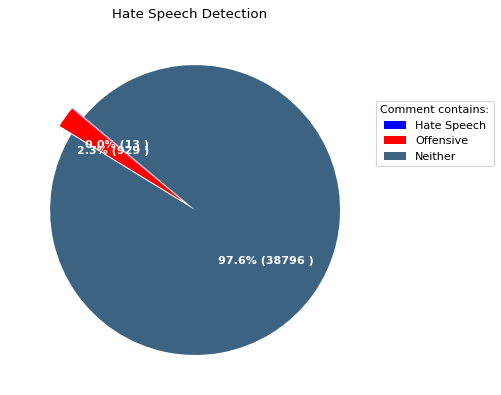

In [ ]:
# Draw Plot
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"), dpi= 80)

data = [df.Class.value_counts()[-1], df.Class.value_counts()[1], df.Class.value_counts()[0]]
categories = ['Hate Speech', 'Offensive', 'Neither']
explode = [0.05,0.05,0.05]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=['blue', 'red', '#3c6382'],
                                  startangle=140,
                                  explode=explode)

# Decoration
ax.legend(wedges, categories, title="Comment contains:", loc="center left", bbox_to_anchor=(1, 0.2, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Hate Speech Detection", fontsize=12)
plt.show()

### Histogram

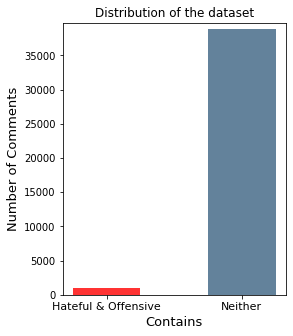

In [ ]:
labels = ['Hateful & Offensive', 'Neither']
freq = [df.Class.value_counts()[-1] + df.Class.value_counts()[1], df.Class.value_counts()[0]]
index = np.arange(len(freq))

plt.figure(figsize=(4,5))
plt.bar(index, freq, alpha=0.8, width=0.5, color=['red','#3c6382','black'])
plt.xlabel('Contains', fontsize=13)
plt.ylabel('Number of Comments', fontsize=13)
plt.xticks(index, labels, fontsize=11) 
plt.title("Distribution of the dataset", fontsize=12)
plt.ylim(0, len(df['comment']))
plt.show()

In [ ]:
labels = ['Hate Speech', 'Offensive Language']
freq1 = [df.Class.value_counts()[-1], df.Class.value_counts()[1]]
index1 = np.arange(len(freq1))

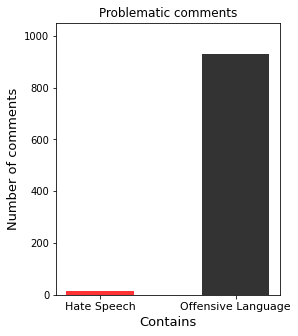

In [ ]:
plt.figure(figsize=(4,5))
plt.bar(index1, freq1, alpha=0.8, width=0.5, color=['red','black'])
plt.xlabel('Contains', fontsize=13)
plt.ylabel('Number of comments', fontsize=13)
plt.xticks(index, labels, fontsize=11) 
plt.title("Problematic comments", fontsize=12)
plt.ylim(0, 1050)
plt.show()

###  Seperate the dataset accordingly to contining hateful comments, offensive language and neither

In [ ]:
df_hate = df[df['Class']=='hate_speech']
df_offensive = df[df['Class']=='offensive_language']
df_neither = df[df['Class']=='neither']

In [ ]:
df_neither.sentiment.value_counts()

 1    26962
 0     8067
-1     3768
Name: sentiment, dtype: int64

In [ ]:
df_offensive.sentiment.value_counts()

 1    529
-1    224
 0    177
Name: sentiment, dtype: int64

### Analyzed offensive and neutral Comments

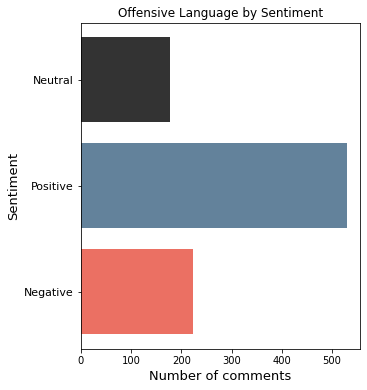

In [ ]:
labels = ['Negative', 'Positive', 'Neutral']
freq = [df_offensive.sentiment.value_counts()[-1], df_offensive.sentiment.value_counts()[1], df_offensive.sentiment.value_counts()[0]]
index = np.arange(len(freq))

plt.figure(figsize=(5,6))

# Chart 2: Sentiment of Comments classified as Offensive
plt.barh(index, freq, alpha=0.8, color=['#e74c3c','#3c6382','black'])
plt.xlabel('Number of comments', fontsize=13)
plt.ylabel('Sentiment', fontsize=13)
plt.yticks(index, labels, fontsize=11) 
plt.title("Offensive Language by Sentiment", fontsize=12)
plt.show()

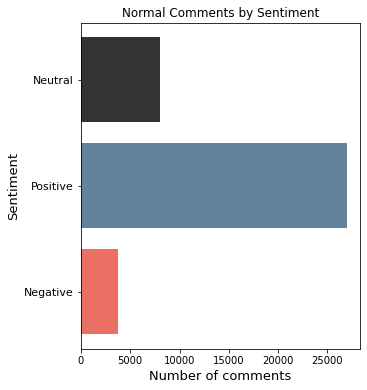

In [ ]:
labels = ['Negative', 'Positive', 'Neutral']
freq = [df_neither.sentiment.value_counts()[-1], df_neither.sentiment.value_counts()[1], df_neither.sentiment.value_counts()[0]]
index = np.arange(len(freq))

plt.figure(figsize=(5,6))

# Chart 3: Sentiment of Comments classified as Neither
plt.barh(index, freq, alpha=0.8, color=['#e74c3c','#3c6382','black'])
plt.xlabel('Number of comments', fontsize=13)
plt.ylabel('Sentiment', fontsize=13)
plt.yticks(index, labels, fontsize=11) 
plt.title("Normal Comments by Sentiment", fontsize=12)
plt.show()

### Scatter Plot of Hate Score

<Figure size 1440x360 with 0 Axes>

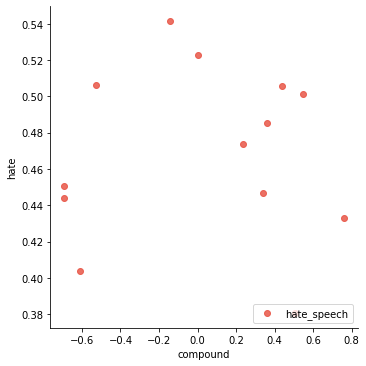

In [ ]:
# Provide a dictionary to the palette argument
plt.figure(figsize=(20,5))
sns.lmplot( x="compound", y="hate", data=df_hate, fit_reg=False, hue='Class', legend=False, palette=dict(neither="black", offensive_language="#3c6382", hate_speech="#e74c3c"))
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
plt.show()

### Top 10 Hateful Comments

In [ ]:
df_hate.sort_values('hate', inplace=True, ascending=False)

In [ ]:
df_hate.reset_index(drop=True, inplace=True)

In [ ]:
df_hate.head(10)

,comment,negative,neutral,positive,compound,sentiment,Class,hate,offensive,neither
0,Don&#39;t show this video to a feminist they a...,0.116,0.785,0.098,-0.1449,-1,hate_speech,0.541514,0.052400,0.406085
1,wide neck nigga,0.000,1.000,0.000,0.0000,0,hate_speech,0.522910,0.470754,0.006336
2,Spocchio Stfu stupid.,0.630,0.370,0.000,-0.5267,-1,hate_speech,0.506014,0.166733,0.327253
3,&quot;Mastering Python&quot; By Michael B. Whi...,0.000,0.734,0.266,0.4404,1,hate_speech,0.505481,0.431400,0.063118
4,the negative weights will make the sum higher ...,0.107,0.678,0.215,0.5478,1,hate_speech,0.501181,0.419648,0.079171
5,Your white board text property is like z-index...,0.000,0.815,0.185,0.3612,1,hate_speech,0.485133,0.461374,0.053492
6,Letters are more similar to numbers than white...,0.000,0.943,0.057,0.2382,1,hate_speech,0.473595,0.419502,0.106903
7,Answer &quot;D&quot; Singularity may kill mank...,0.485,0.515,0.000,-0.6908,-1,hate_speech,0.450524,0.150170,0.399306
8,"Thats just the color value, where black is 0 a...",0.000,0.833,0.167,0.3400,1,hate_speech,0.446531,0.363368,0.190101
9,One thing I&#39;d think about doing is that we...,0.092,0.888,0.020,-0.6908,-1,hate_speech,0.443883,0.416093,0.140024


###  Top 10 Offensive Comments

In [ ]:
df_offensive.sort_values('offensive',inplace=True, ascending=False)

In [ ]:
df_offensive.reset_index(drop=True, inplace=True)

In [ ]:
df_offensive.head(10)

,comment,negative,neutral,positive,compound,sentiment,Class,hate,offensive,neither
0,bitch you don&#39;t know my life,0.432,0.568,0.000,-0.5859,-1,offensive_language,0.009290,0.990682,0.000028
1,"Shit, this episode screws me",0.651,0.349,0.000,-0.6808,-1,offensive_language,0.036303,0.963268,0.000429
2,Good shit man. Good shit. <br><br>Keep it up.,0.424,0.235,0.341,-0.3400,-1,offensive_language,0.037729,0.962258,0.000013
3,i know why the teachers giving shit,0.360,0.400,0.240,-0.2960,-1,offensive_language,0.034702,0.961402,0.003896
4,@pinned By code with Harry shit,0.474,0.526,0.000,-0.5574,-1,offensive_language,0.035983,0.960616,0.003401
5,i always watch these when im high and this shi...,0.235,0.609,0.155,-0.3506,-1,offensive_language,0.032298,0.959196,0.008507
6,Its best and still i dont get it<br>Shit,0.000,0.588,0.412,0.6369,1,offensive_language,0.037381,0.959034,0.003585
7,W3school is pretty useless shit. Use the Headf...,0.386,0.422,0.193,-0.4939,-1,offensive_language,0.028291,0.953240,0.018470
8,oh shit my bad i figured it out u gotta use qu...,0.372,0.628,0.000,-0.7964,-1,offensive_language,0.022658,0.953011,0.024331
9,Ruined by shit audio,0.770,0.230,0.000,-0.7717,-1,offensive_language,0.046552,0.948359,0.005090


In [ ]:
df_offensive.to_excel("df_offensive.xlsx")

### Trying on Specific Comments

In [ ]:
list(sonar.ping(text=df['comment'].iloc[189]).values())

['U kept ur words.u made us understand simple.thank u.can I get datasets.',
 'neither',
 [{'class_name': 'hate_speech', 'confidence': 0.08186037153545485},
  {'class_name': 'offensive_language', 'confidence': 0.3260903532344106},
  {'class_name': 'neither', 'confidence': 0.5920492752301345}]]

In [ ]:
sonar.ping(text="What a bullshit video")

{'classes': [{'class_name': 'hate_speech', 'confidence': 0.07837191429579946},
  {'class_name': 'offensive_language', 'confidence': 0.4040704050522746},
  {'class_name': 'neither', 'confidence': 0.5175576806519259}],
 'text': 'What a bullshit video',
 'top_class': 'neither'}

In [ ]:
sonar.ping(text="An excellent narration")

{'classes': [{'class_name': 'hate_speech', 'confidence': 0.03981285152760139},
  {'class_name': 'offensive_language', 'confidence': 0.32427200631375713},
  {'class_name': 'neither', 'confidence': 0.6359151421586414}],
 'text': 'An excellent narration',
 'top_class': 'neither'}

### Saving Results

In [ ]:
df.drop(['negative', 'neutral', 'positive', 'compound', 'sentiment'],axis=1, inplace=True)
df.to_pickle('/content/drive/MyDrive/YouTube-Project/hate-sonar.pkl')